# National Football League (NFL) Play by Play 2019-2017


In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [41]:
df = pd.read_csv("data/NFL Play by Play 2009-2016 (v3).csv")

C:\Users\Vu Snape\AppData\Local\Temp\ipykernel_11444\357122098.py:1: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/NFL Play by Play 2009-2016 (v3).csv")


## Explore Data

In [42]:
df.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [43]:
df.shape

(362447, 102)

In [44]:
pd.set_option('display.max_rows', 500)


### Columns & Descriptions
 - Drive - Indicator of times ball has been possessed. Team does not matter
 - qtr - Quarter
 - down - Which down is being played
 - TimeUnder - Minutes portioned into 16 intervals (0-15)
 - TimeSecs - Total amount of seconds remaining, starting from 3600 (60 minutes)
 - SideofField - Ball is either in offense's territory or defense's territory
 - yrdln - which yardline ball is on at beginning of play, from 1-50
 - yrdline100 - which yardline ball is on in respect to the whole field - 1-100
 - ydstogo - Yards needed for a first down
 - GoalToGo - Is the ball within the opoonent's 10 yard line? (Yes/No)
 - FirstDown - Whether play resulted in a first down
 - Offensiveteam - Offensive team
 - DefensiveTeam - Defensive Team
 - PlayAttempted - Whether play was attempted?
 - Yards.Gained - Amount of yards gained
 - Touchdown - Touchdown scored (Yes/No)
 - PuntResult - Whether punt was clean or blocked
 - PlayType - Type of play
 - Passer - Who threw the ball
 - PassAttempt - Was a pass attempted (Yes/No)
 - PassOutcome - Complete or incomplete
 - PassLength - Short or deep
 - AirYards - Distance ball traveled in the air
 - YardsAfterCatch - How many yards gained after ball was received
 - QBHit - Was the quarterback hit on the play? (Not exclusively sacks)
 - PassLocation - Left,right, middle
 - InterceptionThrown - Was there an interception (Yes/No)
 - Interceptor - Who intercepted the pass
 - Rusher - Who ran the ball
 - RushAttempt - Was it a rushing play (Yes/No)
 - RunLocation - Left, right, middle
 - RunGap - More specifically where the ball was rushed (end, tackle, guard)
 - Receiver - Who caught the ball
 - Reception - Was the ball caught?
 - Returner - Which player returned the ball on a kickoff or punt
 - Fumble - Was the ball fumbled (Yes/No)
 - RecFumbTeam - Name of team that recovered the fumble
 - RecFumbPlayer - Name of player that recovered the fumble
 - Sack - Was there a sack (Yes/No)
 - OffensiveTeamScore - Amount of total points for offensive team?
 - DefensiveTeamScore - Amount of total points allowed for defensive team?
 - ScoreDiff - Point differential
 - AbsScoreDiff - Absolute value of ScoreDiff
 - HomeTeam - Name of home team
 - AwayTeam - Name of away team
 - Timeout_Indicator - Was a timeout called on the play? (Yes/No)
 - Season - Year of NFL season

In [45]:
df.dtypes

Date                            object
GameID                           int64
Drive                            int64
qtr                              int64
down                           float64
time                            object
TimeUnder                        int64
TimeSecs                       float64
PlayTimeDiff                   float64
SideofField                     object
yrdln                          float64
yrdline100                     float64
ydstogo                          int64
ydsnet                           int64
GoalToGo                       float64
FirstDown                      float64
posteam                         object
DefensiveTeam                   object
desc                            object
PlayAttempted                    int64
Yards.Gained                     int64
sp                               int64
Touchdown                        int64
ExPointResult                   object
TwoPointConv                    object
DefTwoPoint              

In [46]:
missing_count = df.isna().sum()

In [47]:
print("Number of columns have missing data: %d" % len(missing_count.loc[missing_count != 0]))
missing_cols = missing_count.loc[missing_count != 0].sort_values(ascending= False)
print(missing_cols)

Number of columns have missing data: 65
DefTwoPoint            362433
BlockingPlayer         362341
TwoPointConv           361919
ChalReplayResult       359476
RecFumbPlayer          358513
RecFumbTeam            358513
Interceptor            358387
FieldGoalDistance      354528
FieldGoalResult        354431
ExPointResult          353399
PenaltyType            347849
Timeout_Team           347538
ReturnResult           346547
PuntResult             342560
Returner               339535
PenalizedPlayer        337483
PenalizedTeam          336362
Tackler2               318045
RunGap                 284605
RunLocation            256187
Rusher                 255254
Rusher_ID              252165
Receiver_ID            222265
yacWPA                 220956
airWPA                 220738
yacEPA                 220734
airEPA                 220641
Receiver               218647
PassLocation           213772
PassLength             213772
Passer                 213358
PassOutcome            212823


## Solution to solve missing data
1. Drop N/a: 
   * drop rows
   * drop cols
2.  Fill N/A

### Note in row:
- In each sample/row, there are also have N/a values.

In [48]:
df_dropped_row = df.dropna()
print(df_dropped_row)

Empty DataFrame
Columns: [Date, GameID, Drive, qtr, down, time, TimeUnder, TimeSecs, PlayTimeDiff, SideofField, yrdln, yrdline100, ydstogo, ydsnet, GoalToGo, FirstDown, posteam, DefensiveTeam, desc, PlayAttempted, Yards.Gained, sp, Touchdown, ExPointResult, TwoPointConv, DefTwoPoint, Safety, Onsidekick, PuntResult, PlayType, Passer, Passer_ID, PassAttempt, PassOutcome, PassLength, AirYards, YardsAfterCatch, QBHit, PassLocation, InterceptionThrown, Interceptor, Rusher, Rusher_ID, RushAttempt, RunLocation, RunGap, Receiver, Receiver_ID, Reception, ReturnResult, Returner, BlockingPlayer, Tackler1, Tackler2, FieldGoalResult, FieldGoalDistance, Fumble, RecFumbTeam, RecFumbPlayer, Sack, Challenge.Replay, ChalReplayResult, Accepted.Penalty, PenalizedTeam, PenaltyType, PenalizedPlayer, Penalty.Yards, PosTeamScore, DefTeamScore, ScoreDiff, AbsScoreDiff, HomeTeam, AwayTeam, Timeout_Indicator, Timeout_Team, posteam_timeouts_pre, HomeTimeouts_Remaining_Pre, AwayTimeouts_Remaining_Pre, HomeTimeouts

### Note: In columns

In [49]:
df_dropped_col = df.dropna(axis=1)
print(df_dropped_col.shape)

(362447, 37)


In [50]:
print("Columns in orginal data: %d \n" % df.shape[1])
print("Columns in N/a's dropped: %d \n" % df_dropped_col.shape[1])

Columns in orginal data: 102 

Columns in N/a's dropped: 37 



In [51]:
df_dropped_col.columns

Index(['Date', 'GameID', 'Drive', 'qtr', 'TimeUnder', 'ydstogo', 'ydsnet',
       'PlayAttempted', 'Yards.Gained', 'sp', 'Touchdown', 'Safety',
       'Onsidekick', 'PlayType', 'PassAttempt', 'AirYards', 'YardsAfterCatch',
       'QBHit', 'InterceptionThrown', 'RushAttempt', 'Reception', 'Fumble',
       'Sack', 'Challenge.Replay', 'Accepted.Penalty', 'Penalty.Yards',
       'HomeTeam', 'AwayTeam', 'Timeout_Indicator', 'posteam_timeouts_pre',
       'HomeTimeouts_Remaining_Pre', 'AwayTimeouts_Remaining_Pre',
       'HomeTimeouts_Remaining_Post', 'AwayTimeouts_Remaining_Post',
       'ExPoint_Prob', 'TwoPoint_Prob', 'Season'],
      dtype='object')

## Fill n/a 

In [52]:
df_dropped_col['PlayType'].unique()

array(['Kickoff', 'Pass', 'Run', 'Punt', 'Sack', 'Field Goal', 'No Play',
       'Quarter End', 'Two Minute Warning', 'Timeout', 'Extra Point',
       'QB Kneel', 'End of Game', 'Spike', 'Half End'], dtype=object)

## Note:
- df_dropped_col have 37 cols 
- 

## Visualization:
- 1. Extract years from 2009 - 2017
    * In each year, visualization about yard.gained. 

C:\Users\Vu Snape\AppData\Local\Temp\ipykernel_11444\2110407640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped_col['Date'] = pd.to_datetime(df_dropped_col['Date'])


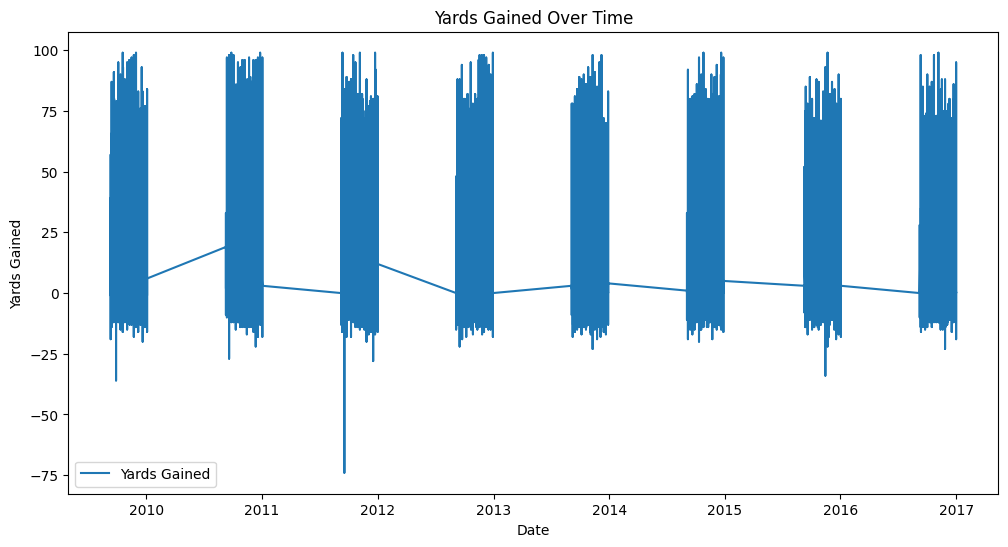

In [53]:
df_dropped_col['Date'] = pd.to_datetime(df_dropped_col['Date'])

df_dropped_col = df_dropped_col.sort_values(by='Date')

# Tạo biểu đồ đường
plt.figure(figsize=(12, 6))
plt.plot(df_dropped_col['Date'], df_dropped_col['Yards.Gained'], label='Yards Gained')
plt.xlabel('Date')
plt.ylabel('Yards Gained')
plt.title('Yards Gained Over Time')
plt.legend()
plt.show()

### Split data

In [54]:
seasons = df_dropped_col['Season'].unique()

# Tạo một từ điển để lưu trữ các DataFrame cho từng mùa
season_data = {}

# Lặp qua từng mùa và tách dữ liệu cho mỗi mùa
for season in seasons:
    season_data[season] = df_dropped_col[df_dropped_col['Season'] == season]

In [55]:
season_data[2009].index

Index([    0,   114,   115,   116,   117,   118,   119,   120,   121,   113,
       ...
       42771, 42780, 42781, 42782, 42783, 42784, 42785, 42786, 42779, 42787],
      dtype='int64', length=44596)

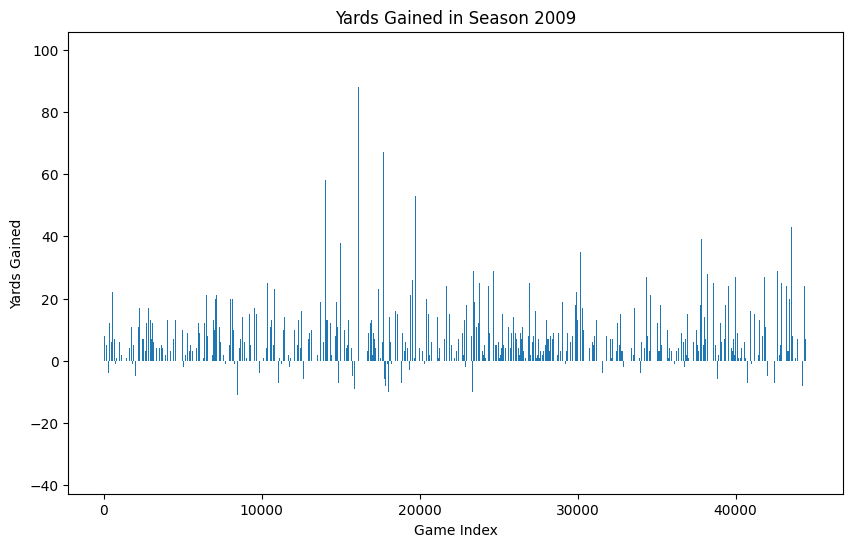

In [56]:
# Crete bar chart for 'Yards.Gained' in season 2009
plt.figure(figsize=(10, 6))
plt.bar(season_data[2009].index, season_data[2009]['Yards.Gained'])

plt.xlabel('Game Index')
plt.ylabel('Yards Gained')
plt.title(f'Yards Gained in Season {2009}')
plt.show()

### Sum of yard in each season 

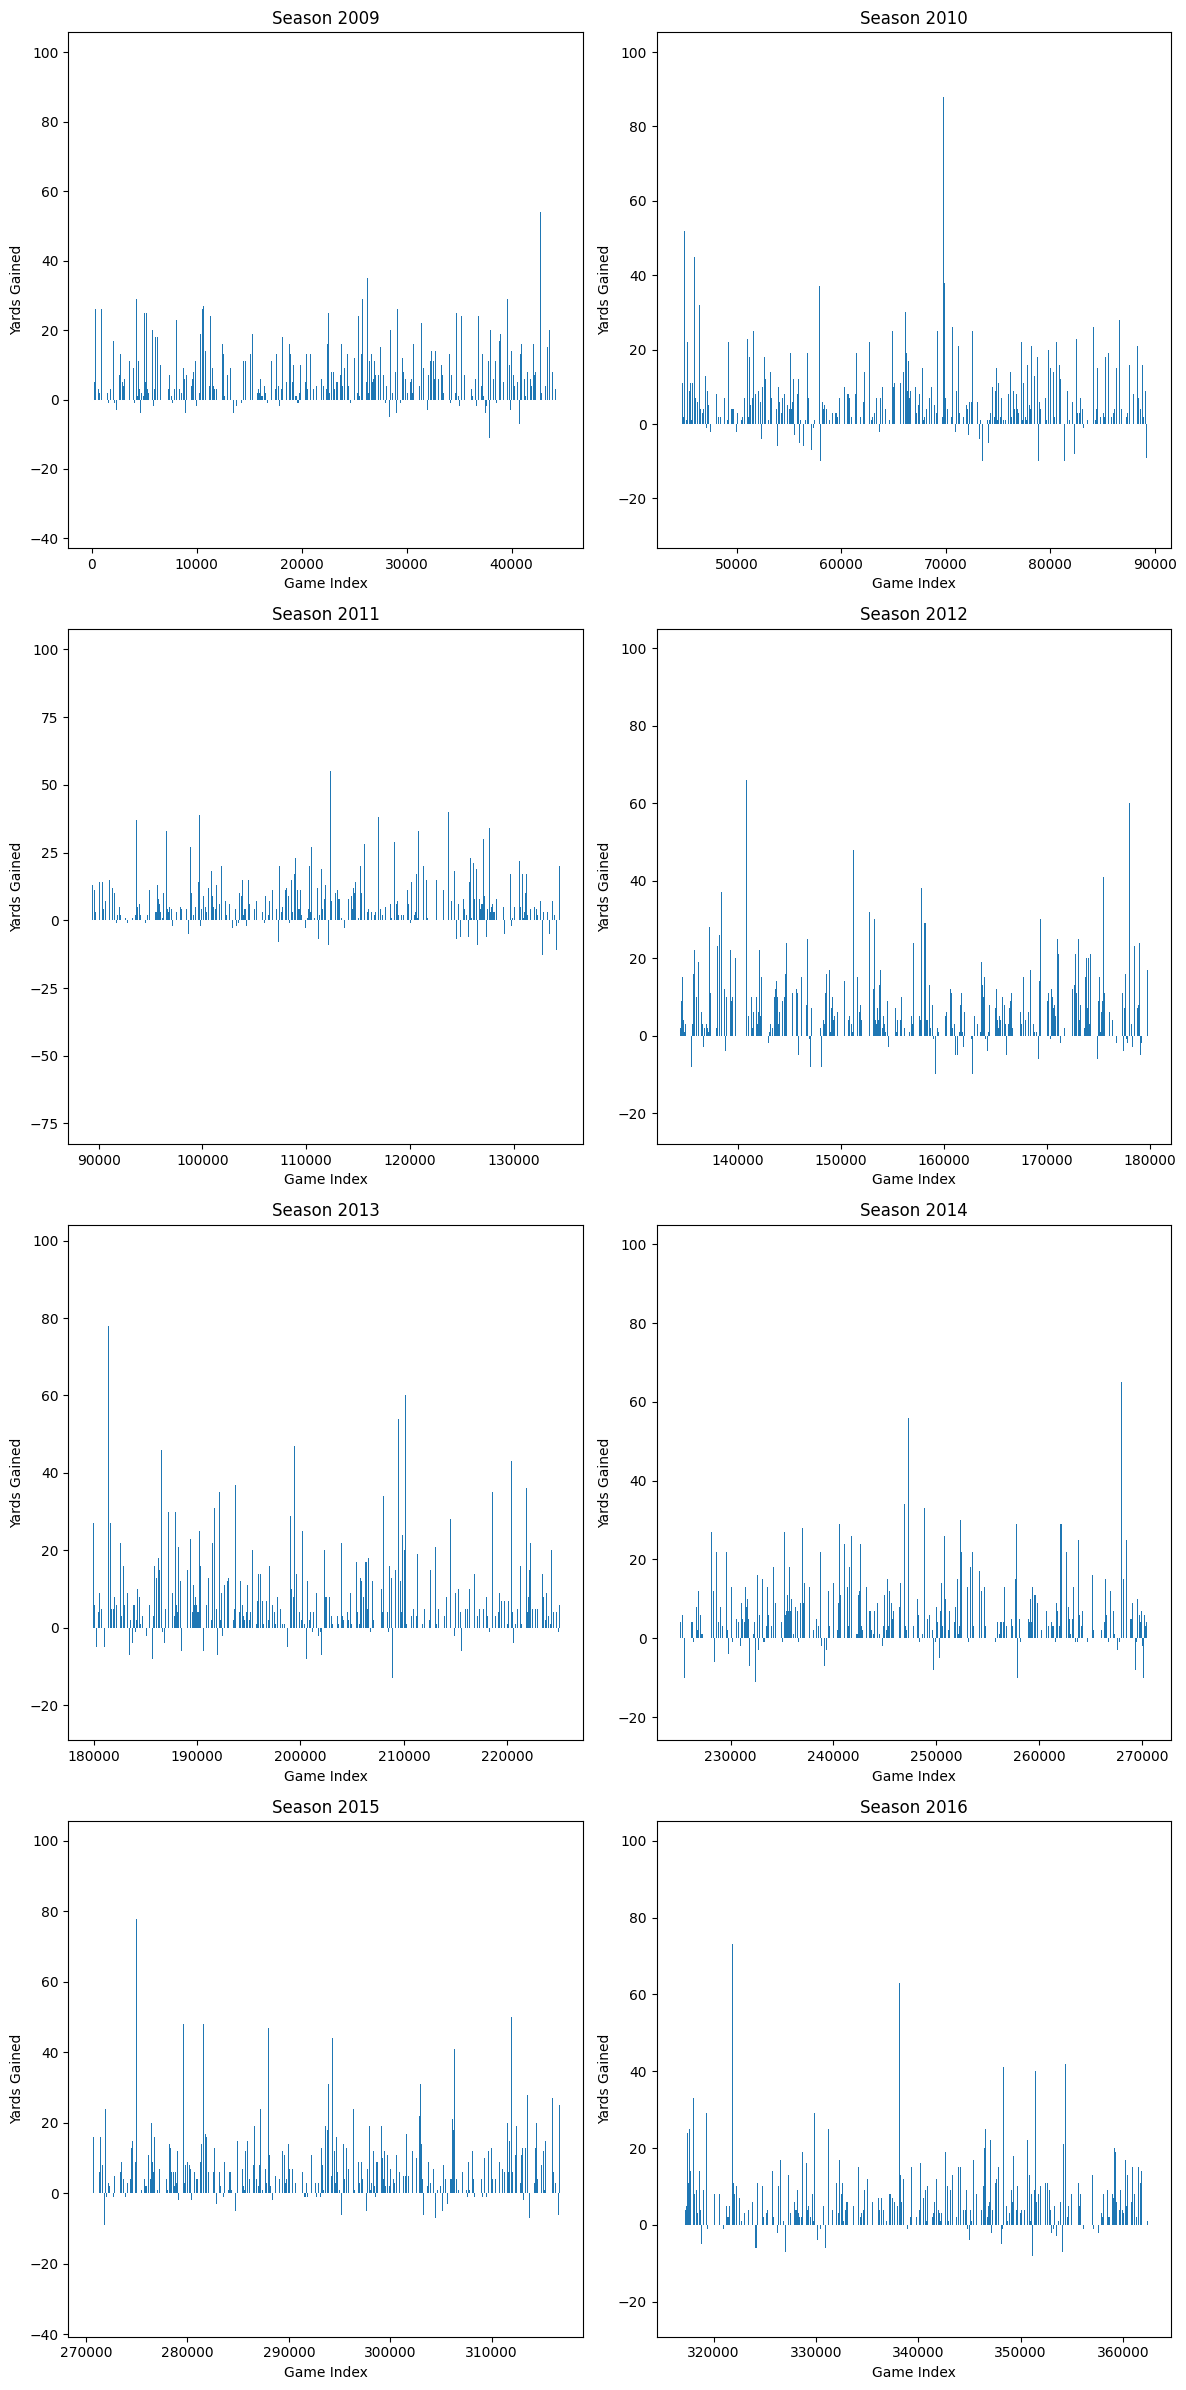

In [57]:
n_rows = 4
n_cols = 2
# Get list season
seasons = list(season_data.keys())

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 6))

#Visualization
for i in range(n_rows):
    for j in range(n_cols):
        idx = i * n_cols + j
        if idx < len(seasons):
            season = seasons[idx]
            ax[i, j].bar(season_data[season].index, season_data[season]['Yards.Gained'])
            ax[i, j].set_title(f'Season {season}')
            ax[i, j].set_xlabel('Game Index')
            ax[i, j].set_ylabel('Yards Gained')
            
            

for i in range(n_rows):
    for j in range(n_cols):
        idx = i * n_cols + j
        if idx >= len(seasons):
            fig.delaxes(ax[i, j])
            
#Show
plt.tight_layout()  #word are not duplicate display
plt.show()
        

###  The Percentage of Touchdown and interception 

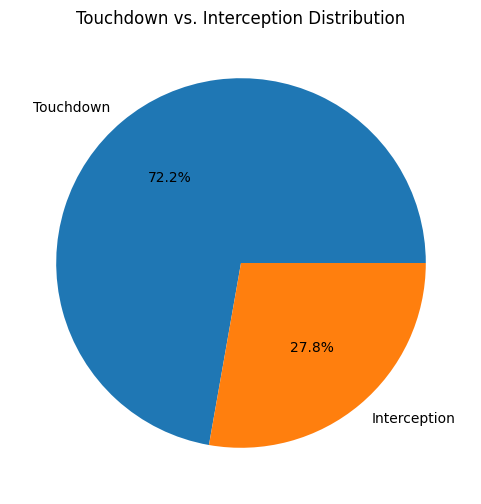

In [58]:
touchdown_count = df_dropped_col['Touchdown'].sum()
interception_count = df_dropped_col['InterceptionThrown'].sum()

# Create pie chart
labels = ['Touchdown', 'Interception']
sizes = [touchdown_count, interception_count]
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Touchdown vs. Interception Distribution')
plt.show()

#### The Percentage of Touchdown and interception from 2009 to 2016

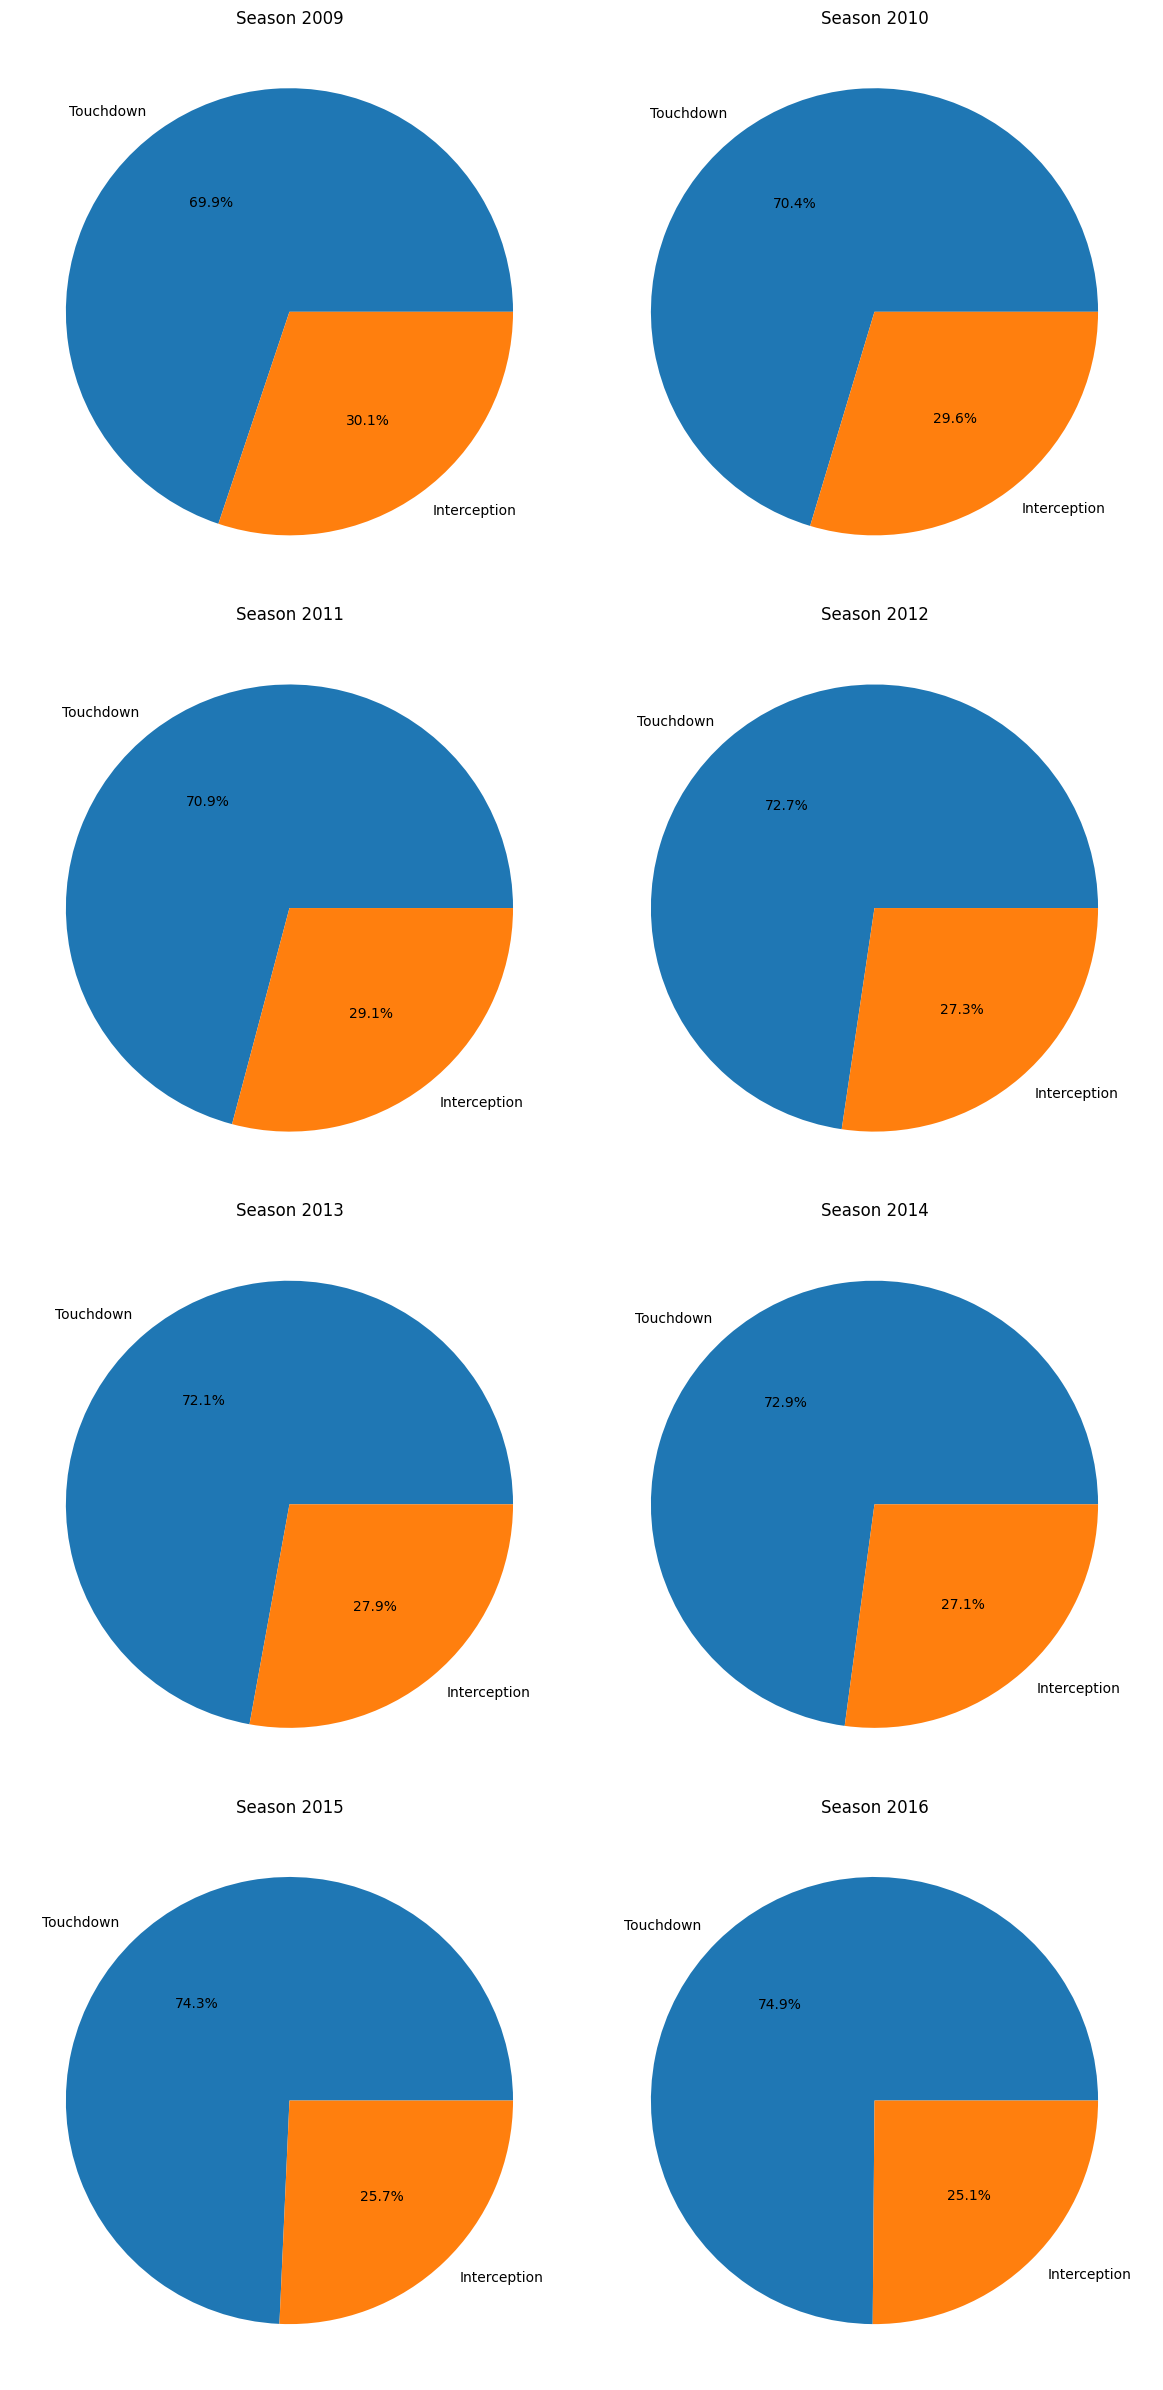

In [59]:
n_rows = 4
n_cols = 2

# Create graph
fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 6))

# Biểu đồ tròn cho tỷ lệ Touchdown và Interception trong mỗi mùa
for i in range(n_rows):
    for j in range(n_cols):
        idx = i * n_cols + j
        if idx < len(seasons):
            season = seasons[idx]
            
            touchdown_count = season_data[season]['Touchdown'].sum()
            interception_count = season_data[season]['InterceptionThrown'].sum()
            
            # Calculate the percentage
            total_plays = len(season_data[season])
            touchdown_percentage = (touchdown_count / total_plays) * 100
            interception_percentage = (interception_count / total_plays) * 100
            
            labels = ['Touchdown', 'Interception']
            sizes = [touchdown_percentage, interception_percentage]
            
            # Draw pie chart
            ax[i, j].pie(sizes, labels=labels, autopct='%1.1f%%')
            ax[i, j].set_title(f'Season {season}')

# Make sure that there are no empty 
for i in range(n_rows):
    for j in range(n_cols):
        idx = i * n_cols + j
        if idx >= len(seasons):
            fig.delaxes(ax[i, j])

plt.tight_layout()
plt.show()


#### Count the number of appearance of "Play type"

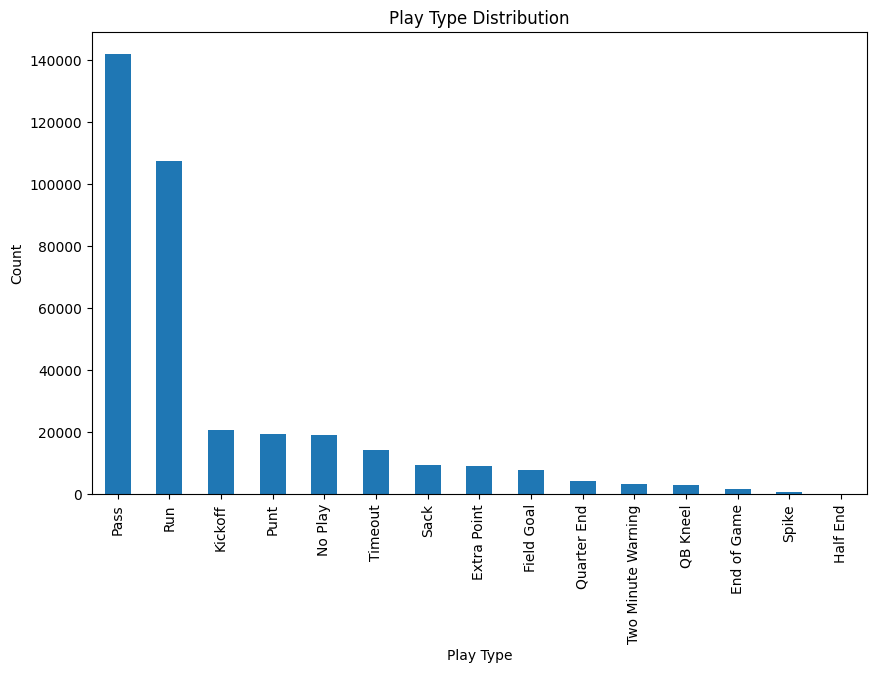

In [60]:
# Đếm số lần xuất hiện của mỗi loại chơi
play_type_counts = df_dropped_col['PlayType'].value_counts()

# Create bar chart
plt.figure(figsize=(10, 6))
play_type_counts.plot(kind='bar')
plt.xlabel('Play Type')
plt.ylabel('Count')
plt.title('Play Type Distribution')
plt.show()